# Assignment 1
Welcome to the first programming assigment for the course. This assignments will help to familiarise you with qiskit while revisiting the topics discussed in this week's lectures. 

### Submission Guidelines
For final submission, and to ensure that you have no errors in your solution, please use the 'Restart and Run All' option availble in the Kernel menu at the top of the page. 
To submit your solution, run the completed notebook and then copy the two strings at the bottom of the notebook (which will be generated from your answers) and paste them in the google form associated with the assignment. In addition to this, please also attach the solved notebook as a file using the 'Add or Create' option under the 'Your Work' heading on the assignment page. 

In [1]:
%matplotlib inline
import hashlib
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import HGate
success_msg = 'Your answer is correct and has been saved. Please continue to the next section.'
fail_msg = 'Your answer is not correct. Please try again.'

## Rotations on the Bloch sphere
A general single-qubit state on the Bloch sphere is denoted by the statevector $$ |\psi\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$
We have seen the phase-shift operation $R_{\phi}$ corresponding to rotation by some angle $\phi$ about the $z$-axis. The statevector on the Bloch sphere traces a horizontal circle (a line of latitude) by $\phi$  radians. This operation has the matrix representation
$$ 
R_{\phi} = 
\begin{pmatrix}
    1 & 0 \\
    0 & e^{i\phi}
\end{pmatrix}
$$
This operation changes the relative phase of the statevector, hence the name. 
It stands to reason that there are operations which rotate a vector about other axes too. We have already seen that the phase-shift gate is a generalisation of the Pauli $Z$ gate. So it is reasonable to think that rotation about the $x$-axis and $y$-axis might be related to the Pauli $X$ and $Y$ operations. This is indeed the case. In general a rotation about a Pauli axis (these are synonymous with the $x$, $y$ and $z$ axes for our purposes) is represented by $$R_{P}(\theta) = \exp(-i\theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

For the purposes of this assigment, a generalised rotation about the $x$-axis can be performed using the operation

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} 
$$
A generalised rotation about the $y$-axis can be performed using the operation
$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} 
$$
And a generalised rotation about the $z$-axis can be performed using the operation
$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}
$$

Note that here we have used an equivalent as it is different to $R_{\phi}$ by a global phase $e^{-i \phi/2}$.

If we start in the $|0\rangle$ state, as all quantum circuits in qiskit do, we can get to the general state $|\psi\rangle$ by first performing a rotation about the $y$-axis by an angle $\theta$, followed by a rotation about the $z$-axis by an angle $\phi$.

$$ |\psi\rangle = R_z(\phi) R_y(\theta) |0\rangle$$

You can find a summary of all the gates available in qiskit [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Single-Qubit-Gates). For this assignment, you are only allowed to use these gates. 

<div class="alert alert-block alert-warning"><b>Conventions:</b> Conventions are important and results can be confusing if the incorrect convention is used. In qiskit, both $\theta$ and $\phi$ are assumed to be positive in the counterclockwise direction. </div>

##  Measurement in different bases
Qiskit allows measurement only in the computational basis directly. However, we can also perform meaurements in other bases. 
For example, consider the Hadamard basis $\{|+\rangle, |-\rangle\}$. When we measure in this basis, we get an outcome that is one of the two basis vectors. This can be done by projecting a general state $|\psi\rangle$ onto each of the basis states $|+\rangle$ and $|-\rangle$. The probability of obtaining the $+$ outcome is $ P_{+}(|\psi\rangle) = |\langle +|\psi\rangle |^{2}$ and similarly for $-$. We note here that $|+\rangle = H|0\rangle$. Taking the adoint of this equation, we get $\langle +| = \langle 0|H^{\dagger} = \langle 0|H$ where we have used the fact that the Hadamard transformation is equal to it's adjoint (easily verified from the matrix representation). So we can write $ P_{+}(|\psi\rangle) = |\langle +|\psi\rangle |^{2} =  |\langle 0| H\psi\rangle |^{2}$. It seems that the probability of measuring the $+$ outcome in the Hadamard basis is the same as the probability of measuring $0$ in the computational basis after applying the Hadamard transformation to the statevector $|\psi\rangle$. So, if we want to measure in the Hadamard basis, we need only to apply a Hadamard gate to our qubit and measure in the computational basis. Similar arguments apply to measuring in other bases too. If we can transform the standard basis states into the basis states for some basis $\mathcal{B}$ via some transformation, applying the inverse transformation allows us to measure in the basis $\mathcal{B}$ using standard basis measurements. 

## **Problem 1**
Prepare the state $|i\rangle$ in a quantum circuit and measure it in the Hadamard basis $\{ |+\rangle, |-\rangle \}$
Below we have provided you with some code to create a quantum circuit. Remember that a qubit in a quantum circuit always begins in the $|0\rangle$ state. Add appropriate gates to prepare the $|i\rangle$ state and then add the appropriate gates and a standard basis measurement to measure required it in the Hadamard basis. You are required to use separate gates for both these actions. 

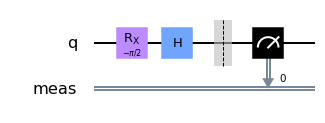

In [2]:
qc1 = QuantumCircuit(1) 
# Insert gates below to create the state 
qc1.rx(-np.pi/2,0)
# Insert the necessary gates to change to the Hadamard basis below
qc1.h(0)
# Do not change below this line
qc1.measure_all()
qc1.draw('mpl')

## **Solution**

The easiest way to prepare the $|i\rangle$ state is to apply a rotation about the $x$-axis by $-\pi/2$ radians. This can be done using The $R_x(-\pi/2)$ gate as shown above. Alternatively, following the discussion in the single-qubit states and operations notebook, $H$ followed by $S$ will also prepare the $|i\rangle$ state. As mentioned above, to measure in the Hadamard basis, you need to apply an $H$ gate and then measure using a standard basis measurement

<div class="alert alert-block alert-info"><b>Instructions:</b>Once your circuit is ready, run the cell below to check and save your answer. You can change your answer by running these two cells in order again. </div>

Your answer is correct and has been saved. Please continue to the next section.


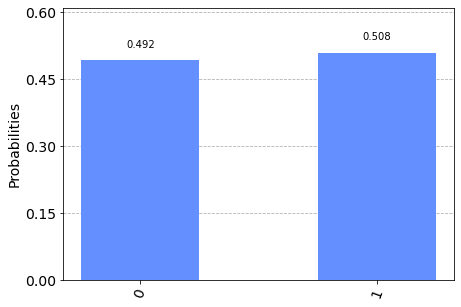

In [3]:
basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'barrier', 'measure']
assert list(qc1.count_ops()) != [], "Circuit cannot be empty"
assert set(qc1.count_ops().keys()).difference(basis_gates) == set(), "Only basic gates are allowed"
job = execute(qc1, backend=QasmSimulator(), shots=1024, seed_simulator=0)
counts = job.result().get_counts()
sv_check = Statevector.from_instruction(qc1.remove_final_measurements(inplace=False)).evolve(HGate()).equiv(Statevector.from_label('r'))
op_check_dict = qc1.count_ops()
_ = op_check_dict.pop('measure', None)
_ = op_check_dict.pop('barrier', None)
op_check = len(op_check_dict) > 1
print(success_msg if (sv_check and op_check) else fail_msg)
answer1 = hashlib.sha256((str(counts)+str(sv_check and op_check)).encode()).hexdigest()
plot_histogram(counts)

## Simulating polarisation of light on a quantum computer
In this exercise, we will use quantum computing to simulate a toy model of photon polarisation.

For a brief refresher on polarisation, and a demonstration of the experiment we will be simulating, watch the segment of the YouTube video below.

Reference: 
Michael Melloch. "Polarization of Electromagnetic Waves" _YouTube_, Jun 20, 2019 https://www.youtube.com/watch?v=6N3bJ7Uxpp0

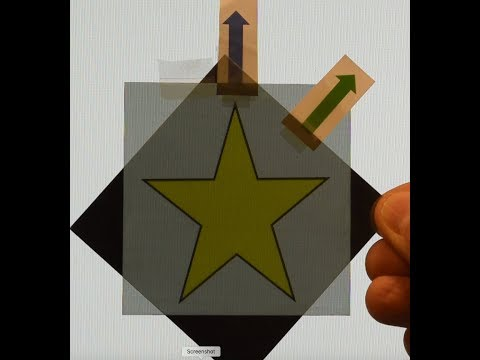

In [4]:
from IPython.display import YouTubeVideo, display
polariser_exp = YouTubeVideo('6N3bJ7Uxpp0', end=93, height=405, width=720, modestbranding=1)
display(polariser_exp)

To simulate the action of a polariser on plane-polarised light, we have to somehow map the problem onto the Bloch sphere. Here is one way to do it. As shown in the video, the light exiting the first polariser is plane-polarised, which means it is polarised in a plane at some angle to the horizontal and vertical axes. After that, the second polariser essentially _projects_ this onto the pass-axis orientation of the polariser, which can be seen as a kind of measurement. So in our quantum circuit, we will consider only this part of the experiment, and see what fraction of the plane polarised light is transmitted through the second polariser as a function of their relative orientation.

To do this, we need to consider only plane-polarised light. Let us assume that the light exiting the first polarizer is horizontally polarised. We know that if we place the second polariser with it's pass-axis vertical, no light will be transmitted. So these two states are orthogonal. Let us map these two states to $|0\rangle$ and $|1\rangle$ respectively (since these are also orthogonal). However, note that while the angle between the two orthogonal polarisation states is $\pi/2$, the angle on the Bloch sphere between $|0\rangle$ and $|1\rangle$ is $\pi$. We know that any other orientation of linearly polarised light can be written as a superposition of these two basis vectors. Moreover, since we are only considering linearly polarised light, we know that the relative phase is $0$. So we can restrict ourselves to the great circle on the Bloch sphere passing through $|0\rangle$, $|+\rangle$, $|1\rangle$ and $|-\rangle$. 



## **Problem 2**
For this experiment, we will need to create a parameterised circuit, where the rotation angle is a parameter. Qiskit enables this using `Parameter()`. We will define a parameter $\beta$ which is the relative angle between the two polarisers. Given below is a quantum circuit where the qubit starts in the $|0\rangle$ state, the equivalent of horizontally plane polarised light. Change the measurement basis using a rotation gate with an angle of rotation in terms of the variable `beta` and measure in this basis. This basis change should correspond to rotating the second polariser by an angle $\beta$. 

<div class="alert alert-block alert-warning"><b>Instructions:</b> We take $\beta$ to be positive in the counter-clockwise direction, as is the convention in qiskit. </div>

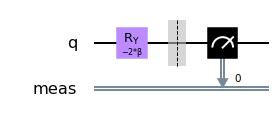

In [5]:
beta = Parameter('β')
qc2 = QuantumCircuit(1)
# Enter your code below this line
qc2.ry(-2*beta, 0)
qc2.measure_all()
# Do not change below this line
qc2.draw(output='mpl')

## **Solution**

First we need to visualise the part of the Bloch sphere onto which we're mapping linearly polarised states. As mentioned above, we can create any state on the Bloch sphere starting from $|0\rangle$ like so $$ |\psi\rangle = R_z(\phi) R_y(\theta) |0\rangle$$
We have also mentioned above that we will be restricting ourselves to the great circle passing through $|0\rangle$, $|+\rangle$, $|1\rangle$ and $|-\rangle$ and that the relative phase is $0$, so we are restricted to the $\phi=0$ circle on the Bloch sphere. The relevant region is highlighted in the diagram below. 

<center><img style="display:block; width: 700px" src="https://github.com/deadbeatfour/quantum-computing-course/raw/master/img/bloch_pol.png" alt="Mapping Linearly Polarised states onto the Bloch sphere"></center>

We note that due to the mapping mentioned above, $\theta = 2\beta$, so a rotation of the polariser in the range $0\le\beta\le\pi$ corresponds to  $0\le\theta\le2\pi$. So the, polarisation state of a photon after the second polariser (with the polariser at an angle $\beta$) can be constructed using
$$ |\beta\rangle = R_y(2\beta) |0\rangle$$
However, we want to measure using this basis (this spans all states on the great circle). To do that, we use the same method as illustrated in the section above regarding measurement in different bases. $$P_{\beta}(|\psi\rangle) = |\langle \beta|\psi\rangle |^{2}$$

Taking the adjoint of the equation to prepate the state $|\beta\rangle$, we get $ \langle \beta| = \langle 0| R_y^{\dagger}(2\beta) = \langle 0| R_y(-2\beta)$, where the last equality is evident from the form of the matrix given above. With this, 

$$P_{\beta}(|\psi\rangle) = |\langle \beta|\psi\rangle |^{2}  = |\langle 0| R_y(-2\beta)|\psi\rangle |^{2}$$

So the appropriate gate to apply would be $R_y(-2\beta)$ and then perform a standard basis measurement.

<div class="alert alert-block alert-info"><b>Instructions:</b>Refer to the lecture slides for the theoretical transmission probability. Fill in that expression in the function below.</div>

In [6]:
def theoretical_prob(beta):
    '''
    Definition of theoretical transmission probability.
    The expression for transmitted probability between two polarisers 
    with a relative angle `beta` given in radians
       
    '''
    # Fill in the correct expression for this probability and assign it to the variable tp below
    # You may use numpy function like so: np.func_name()
    tp = np.cos(-beta)**2
    return tp

<div class="alert alert-block alert-info"><b>Instructions:</b>When you have defined the expression for the transmission probability, run the cell below to save your answer.  You can change your answer by running these two cells in order again. </div>

We will rotate the second polariser through an angle of $\pi$. This means that $0\le\beta\le\pi$. We can repeat this experiment for $\beta$ values in this range and count the number of times we measured a photon passing through the second polariser. 
<div class="alert alert-block alert-info"><b>Instructions:</b>When you have done that, run the cell below to perform the experiment</div>


Your answer is correct and has been saved. Please continue to the next section.


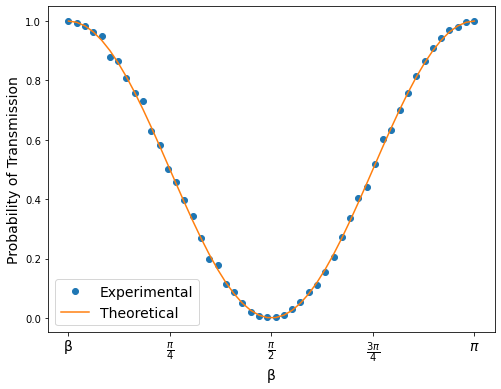

In [7]:
beta_range = np.linspace(0, np.pi, 50)

num_shots = 1024

basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'barrier', 'measure']
assert set(qc1.count_ops().keys()).difference(basis_gates) == set(), "Only basic gates are allowed"
job = execute(qc2,
              backend=QasmSimulator(),
              shots = num_shots,
              parameter_binds=[{beta: beta_val} for beta_val in beta_range], 
              seed_simulator=0) # For consistent results

counts = job.result().get_counts()
# Calculating the probability of photons passing through
probabilities = list(map(lambda c: c.get('0', 0)/num_shots, counts))

pol_checks = [Statevector.from_instruction(qc2.bind_parameters({beta: beta_val})
            .remove_final_measurements(inplace=False))
            .equiv(Statevector([np.cos(-beta_val), np.sin(-beta_val)]))
            for beta_val in beta_range]
print(success_msg if all(pol_checks) else fail_msg)
answer2 = hashlib.sha256((str(probabilities)+str(pol_checks)).encode()).hexdigest()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(beta_range, probabilities, 'o', label='Experimental')
ax.plot(beta_range, theoretical_prob(beta_range), '-', label='Theoretical')

ax.set_xticks([i * np.pi / 4 for i in range(5)])
ax.set_xticklabels(['β', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'], fontsize=14)
ax.set_xlabel('β', fontsize=14)
ax.set_ylabel('Probability of Transmission', fontsize=14)
ax.legend(fontsize=14)